## Student Project

In this notebook the following paper is replicated: M. Brückner and A. Ciccone (2011) "Rain and the Democratic Window of Opportunity", *Econometrica*, Vol. 79, pp. 923-947.

*Accessible in this [classroom](https://github.com/HumanCapitalAnalysis/student-project-maxschae)*.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from auxiliary import *

%matplotlib inline
sns.set()

### Story

The authors claim that temporary negative shocks to income cause institutions in sub-Saharan Africa to become more democratic. Accordingly, negative income shocks decrease the opportunity cost of contesting political power, and to retain stability and command the ruling regime will employ more democratic institutions. Since income per capita and institutions are likely to have unobserved common causes an instrumental variable approach is taken to isolate the variation in income that is exogenous. The instrument is rainfall which is assumed to cause variation in income per capita ($\rightarrow$ IV is relevant), whereas is not correlated with institutional scores (exogeneity assumption) and its only effect on institutions is through income (exclusive restriction assumption). Rainfall affects GDP per capita mainly by increasing the yield in agricultural production, for instance, droughts will have a negative impact on GDP per capita.

The story (and this notebook) unfolds along the two stages of the estimation framework. First, to isolate the exogenous variation in income per capita, GDP per capita is related to rainfall. In the second stage, democracy score(s) are then regressed on the clean variation in income. However, first data are introduced and the identification strategy is presented.

### Data

Panel data: 41 sub-Saharan African countries between 1981 to 2004 (unbalanced) $-$ 955 observations

* Institutional scores available from the Polity IV Project (Center for Global Policy, George Mason University)

* Rainfall stems from the National Aeronautics and Space Administration (NASA) Global Precipitation Climatology Project (GPCP)

* GDP per capita data come from the Penn World Table Version 6.2 (Center for International Comparisons of Production, Income and Prices, University of Pennsylvania)

In [2]:
df = get_panel_dataset()

Descriptive statistics for relevant variables are shown in the table below.

In [3]:
columns = ['polity2', 'exconst', 'exrec', 'polcomp', 'polity_change', 'dum_rain_20', 'dum_rain_10', 
           'recession_l', 'agri_gdpshare', 'gpcp', 'gdp']
df_temp = df[columns]
df_temp.describe()

,polity2,exconst,exrec,polcomp,polity_change,dum_rain_20,dum_rain_10,recession_l,agri_gdpshare,gpcp,gdp
count,955.000000,910.000000,910.000000,910.000000,955.000000,955.000000,955.000000,955.000000,893.000000,955.000000,932.000000
mean,-2.457592,2.910989,4.802198,3.841758,0.249215,0.167539,0.083770,0.505759,31.154650,972.681458,1688.505737
std,5.668427,1.767507,1.914681,3.109872,2.097390,0.373652,0.277187,0.500230,15.622894,497.613007,1879.546631
min,-10.000000,1.000000,1.000000,1.000000,-15.000000,0.000000,0.000000,0.000000,2.200000,96.109329,287.024902
25%,-7.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.250000,552.039703,727.876953
50%,-5.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000,32.619999,944.346802,915.803711
75%,2.000000,4.000000,7.000000,7.000000,0.000000,0.000000,0.000000,1.000000,41.900002,1336.778015,1717.437256
max,9.000000,7.000000,8.000000,10.000000,15.000000,1.000000,1.000000,1.000000,69.330002,2587.636963,10438.830078


### Identification Strategy

#### Causal graph

The basic underlying causal graph is depicted in *Graph 1*, where $Y$ denotes the outcome variable, i.e. institutional scores. $D$ refers to the treatment $-$ GDP per capita or recession $-$ and $Z$ is the instrument rainfall or drought. The node $U$ subsumes all confounding variables that are unobserved and reveals that an unblocked backdoor path from the treatment to the outcome exists, motivating the IV approach.


*Graph 1*
<img src="graphs/causal_graph_1.png" height=500 width=500 />

To cope with country-specifics and fixed effects along the time and country dimensions, the authors include time and country fixed effects as well as a country-specifc time trend. Fixed effects are used to make part of the unobservables observable $-$ i.e. unobserved characteristics that stay constant across time (country fixed effects), or analogously across countries (time fixed effects). However, it is not possible to attribute the (estimated) fixed effects to particular constant characteristics but one can only "observe" those as an aggregate. For instance, unobserved time-constant characteristics could be cultural attitude towoards innovation, risk-taking and change affecting both income and institutions. However, including fixed effects is not informative about the particular effect of cultural attitude towards risk-taking.

Consult *Graph 2* for a representation of fixed effects in the causal graph framework, and note the potentially still existing unobserved relationship between the treatment and the outcome depicted by the dashed line.


*Graph 2*
<img src="graphs/causal_graph_2.png" height=500 width=500 />

#### Threats to identification

* Violation of exogeneity assumption <br>
If the instrument has a direct causal effect on the outcome, the researcher cannot recover the causal effect of interest, i.e. *what is the effect of non-persistent income shocks on institutional scores* ($D \rightarrow Y$). In terms of the causal graph, there exists an unblocked backdoor path from the treatment to the outcome through the instrument ($D \leftarrow Z \rightarrow Y$). A direct effect is present when institutions become more democratic following the event of droughts. Such a case can occur if people connect demands of deepened democratic institutions with the call for democratic governance of water resources, for example. Then droughts would directly cause institutions to become more democratic, given protesters are granted their demands.


*Graph 3*
<img src="graphs/causal_graph_3.png" height=300 width=300 />

* Threats to exclusive restriction <br>
Identification of the causal effect of income shocks on democracy scores is not possible if the instrument has an indirect effect on democracy scores through an unobservable. The resulting backdoor path cannot be blocked and identifying the causal effect fails. Such an additional mechanism that cannot be controlled for could be present, if during droughts international organizations and donor countries scale up their aid financing but can connect this to a constraint executive which increases the combined Polity score, i.e. $Y$.


*Graph 4*
<img src="graphs/causal_graph_4.png" height=300 width=300 />

* A note on the interpretation of causal effect <br>
The identification of the causal effect of negative transitory income shocks on improvements of institutional scores is threatened if negative rainfall shocks affect polity scores by decreasing citizens cost of contesting power not only through income but through other channels, too. The authors mention two potential channels. First, if road floodings vanish in aftermath of a drought, cost of transport and coordination of political protest would decrease. Second, Cekan (1993) finds evidence that young men are more likely to be sent to urban areas in times of drought which may decrease coordination cost of contesting power. In these cases, it is still possible to assess the impact of rainfall shocks on polity scores but the interpretation of the causal effect of interest does not withstand. That is, it cannot be argued that improvements in polity scores are due to negative income shocks.

* Weak instrument problem <br>
Considering a more technical note, it is required that the instrument indeed causes variation in the treatment variable as a weak correlation between the instrument and the treatment leads to an imprecise IV estimator. [SOURCE]. Taking a closer look to the relationship between the instrument and the treatment, it becomes apparent that the implicit assumption for the instrument's relevance is that agriculture's GDP share is large and/or that a substantial amount of people work in agriculture. For countries with a neglectable agricultural sector, shocks to rainfall is a weak instrument for income. This rules out effects on income due to negative effects on productivity in other sectors in times of droughts.

The discussion on the relevance of the instrument will be revisited in the estimation section.

#### Illustrating the Story

Following the introduction, the identification strategy and a short *heads-up* to potential violations (which the reader should keep in mind in the course of this text), the following sub-section comprises visualizations of the reduced-form relationship ($Z \rightarrow Y$) and the two stages ($Z \rightarrow D$ and $D \rightarrow Y$).

First, attention is turned to *Figure 1* replicating the article's *Figure 1*. The graphs show the combined Polity IV score over time for nine countries $-$ due to reasons of representation minus Mali whose graph looks fairly similar to Madagascar's. The grey dashed lines indicate droughts being defined as rainfall below the 20th percentile of the country's rainfall distribution. <br>
At first sight, there are some stunning examples of countries employing much more democratic institutions in times or shortly after droughts. For instance, Kenya's institutional score increased several times shortly after droughts between 1985 and 2002. Also, Benin, Madagascar, Malawi and Mozambique witnessed substantial leaps of the Polity score in times of a negative rainfall shock. However, the evolution of the institutional score seems to be unaffected by various other droughts (e.g. Benin during 1981-1983, Côte d'Ivoire in 1983 or Malawi in 1987).
Yet, this last observation cannot be made when looking at the article's version, where only selected droughts are shown.

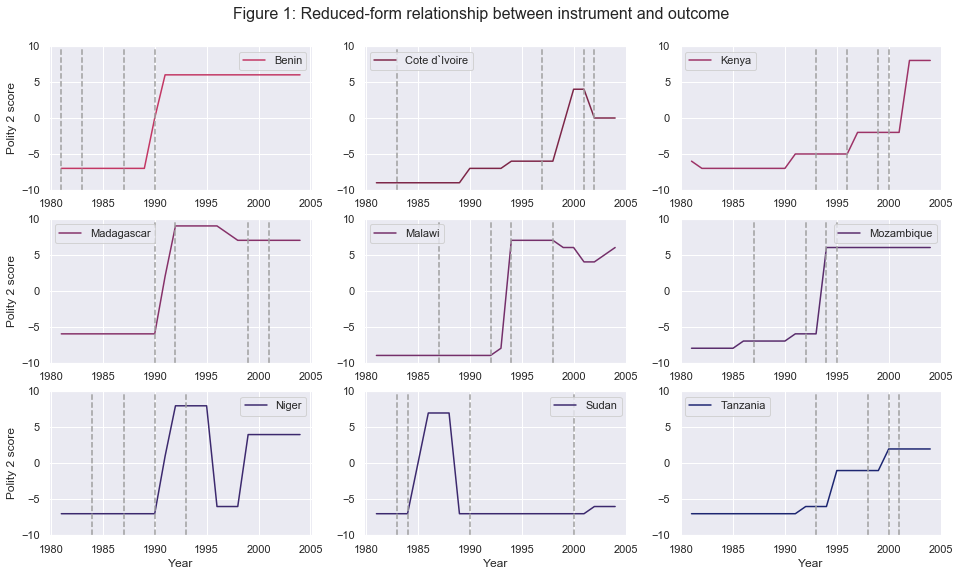

In [4]:
''' Countries presented in paper '''
country_codes = [434, 437, 501, 580, 553, 541, 436, 625, 510]

plot_reduced_form(country_codes, election=False)

In contrast to the reduced-form relationship of $Z$ and $Y$ depicted in *Figure 1*, the sequence of maps below illustrates the chain of mediation ($Z \rightarrow D \rightarrow Y$).

* Left map shows drought in snapshot year
* Center map depicts recession in snapshot year
* Right map reveals change in institutional score from snapshot to subsequent year

*Moving* from the left to the center map is essentially the first stage ($Z \rightarrow D$). A negative shock of the instrument leads to a recession in the same year due to a shortfall in agricultural produce. During these times of crop failure the opportunity cost to contest political power is lowered and the regime in power will deploy more demoratic institutions as a response to protest with a time lag of one year (center to right map), i.e. second stage, or $D \rightarrow Y$.

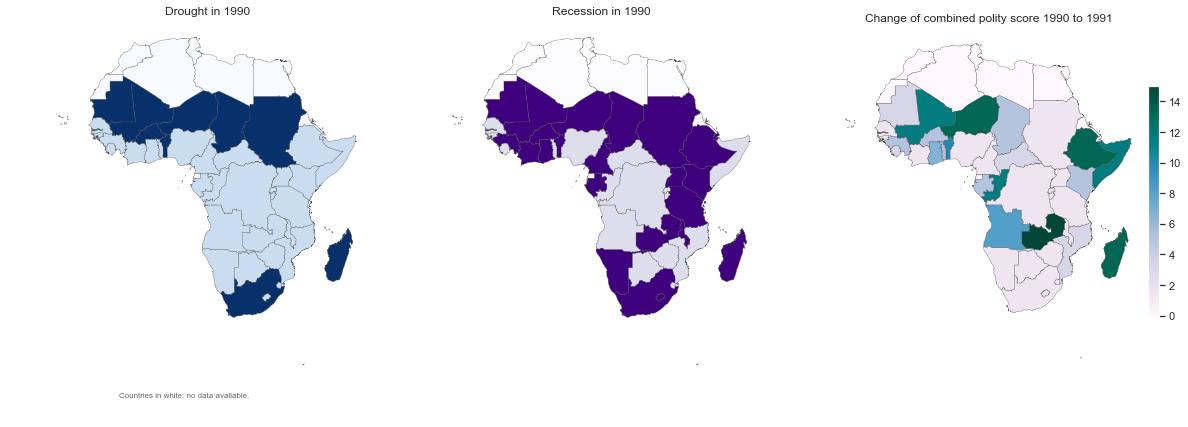

In [5]:
draw_story_map(1991)

Though the above maps are just a snapshot of the time investigated $-$ but a favorable, admittedly $-$ it may tell the reader the underlying story from a different perspective. Going from left to right, one sees that particularly countries partly in the Sahara suffered a drought in 1990 of which all faced a recession in the same year. The co-movement of recessions in 1990 and positive changes of the Polity score in 1991 is present for many countries. But there are a few prominent examples for which this is not the case $-$ i.e. an improvement in institutions occured without a prior recession or despite an economic downswing polity scores did not increase. With the exception of South Africa and Sudan, in countries whose recessions were triggered exogenously through a drought the polity score improved in the subsequent year.

Note that data in this visualization are very stylized, and are only to motivate the story.

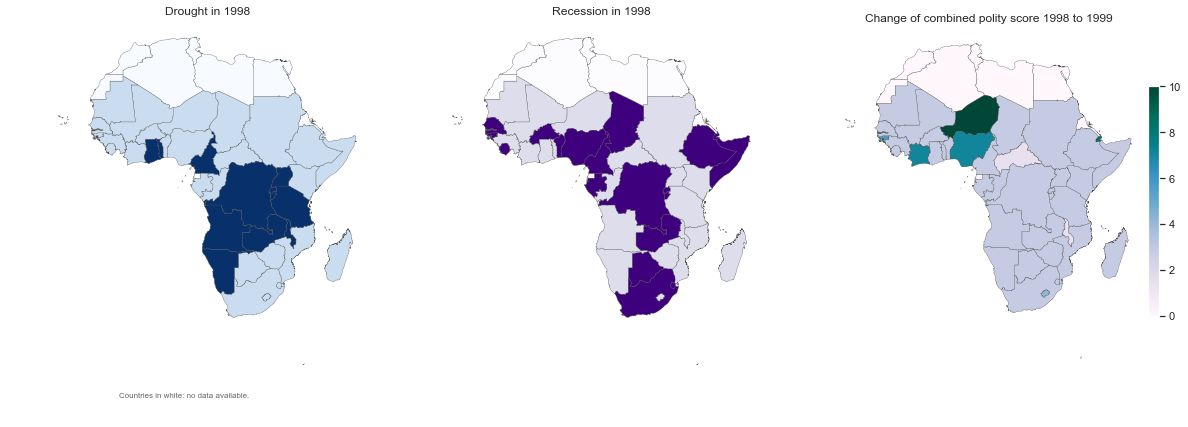

In [6]:
draw_story_map(1999)

However, not every point in time is supportive of the story...

In the next section the 2SLS estimation framework will be shortly discussed.

### First Stage

To isolate the exogenous variation in GDP per capita, the treatment variable is regressed on the instrument which is assumed to not have any relationship with the outcome aside through income.

Including time and country fixed effects plus a country-specific time trend the first stage is depicted by 

\begin{align*}
log(GDP_{t, c}) = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + log(rainfall_{t, c}) + v_{t,c}
\end{align*}
<br>
where $v_{t,c}$ is the error term.

In [5]:
spec_1 = 'lgdp_l2 ~ lgpcp_l2 + C(ccode) + C(ccode) : I(year) + C(year)'    
spec_2 = 'lgdp_l2 ~ lgpcp_l2 + lgpcp_l3 + C(ccode) + C(ccode) : I(year) + C(year)'
spec_3 = 'lgdp_l2 ~ lgpcp_l2 + lgpcp_l3 + lgpcp_l4 + C(ccode) + C(ccode) : I(year) + C(year)'
spec_4 = 'lgdp_l2 ~ lgpcp_l2 + lgpcp_l2_polity2l2 + polity2l2 + C(ccode) + C(ccode) : I(year) + C(year)'  
spec_5 = 'recession_l2 ~ lgpcp_l2 + C(ccode) + C(ccode) : I(year) + C(year)'
spec_6 = 'recession_l2 ~ lgpcp_l2 + lgpcp_l3 + C(ccode) + C(ccode) : I(year) + C(year)'
spec_7 = 'recession_l2 ~ lgpcp_l2 + lgpcp_l3 + lgpcp_l4 + C(ccode) + C(ccode) : I(year) + C(year)'
spec_8 = 'recession_l2 ~ lgpcp_l2 + lgpcp_l2_polity2l2 + polity2l2 + C(ccode) + C(ccode) : I(year) + C(year)'

In [6]:
rslts = smf.ols(formula=spec_1, data=df).fit().summary()
print(rslts)

                            OLS Regression Results                            
Dep. Variable:                lgdp_l2   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     485.0
Date:                Sat, 08 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:38:32   Log-Likelihood:                 881.63
No. Observations:                 955   AIC:                            -1553.
Df Residuals:                     850   BIC:                            -1043.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.07

Rainfall positively affects log GDP per capita contemporaneously and decreases the probability of a recession. Considering further robustness specifications (specification 2-4 and 6-8) including lagged rainfall, the combined polity score and an interaction between the combined polity score and rainfall does indicate that only rainfall in the same period significantly explains GDP per capita, and thus motivates the choice of the first-stage specification.

### Second Stage

After *isolating* the clean variation in GDP per income $-$ fitted values of the first stage, indicated by a hat $-$ are included in the second stage regression. Further, time and country fixed effects plus a country-specific time trend are included. The resulting specification reads
\begin{align*}
log(\Delta\ polity2_{t, c}) = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \widehat{log(GDP_{t-1, c})} + u_{t,c}
\end{align*}
<br>
where $u_{t,c}$ is the error term.

In [8]:
spec_first_stage = 'lgdp_l2 ~ lgpcp_l2 + C(ccode) + C(ccode) : I(year) + C(year)'
rslt = smf.ols(formula=spec_first_stage, data=df).fit()

df['lgdp_l_hat'] = rslt.predict()

spec_second_stage = 'polity_change ~ lgdp_l_hat + C(ccode) + C(ccode) : I(year) + C(year)'
rslts = smf.ols(formula=spec_second_stage, data=df).fit().summary()
print(rslts)

                            OLS Regression Results                            
Dep. Variable:          polity_change   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.252
Date:                Sat, 08 Jun 2019   Prob (F-statistic):             0.0533
Time:                        19:39:42   Log-Likelihood:                -1993.9
No. Observations:                 955   AIC:                             4198.
Df Residuals:                     850   BIC:                             4708.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.29

Interim results